# Overview and Agenda

Classification with Logistic regression using public data for titanic survivals

-	Data exploration, cleaning.
-	Get features ready
-	Getting data ready for modeling
-	Logistic regression with sklearn
    o	First model
    o	Normalization 
    o	Model outcomes 
    o	Verify results quality
-	Simple NN with Keras
    o	Understand the topology of the model
    o	Comparing to Logistic regression 
    o	Same steps as Logistic regression 
-	Adding Hidden layer (if time allows)


 - Some references from Wikipedia
 - Some of the data analysis is taken from http://www.data-mania.com/blog/logistic-regression-example-in-python/

In [1]:
import numpy as np #basic math classes

import pandas as pd #manipulating data
from pandas import Series, DataFrame

import matplotlib.pyplot as plt #basic ploting
import seaborn as sb # more sofisticated ploting, we may use it

import sklearn # ML stuff
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline

C:\Users\shahark\AppData\Local\Continuum\Anaconda3\envs\ztdl\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading the data and exploring

In [2]:
url = "https://raw.githubusercontent.com/shanikotl/PythonTutorial/master/Titanic_train.csv"

titanic = pd.read_csv(url)
# if dataset without cols, use this
#titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


VARIABLE DESCRIPTIONS
-	Survived - Survival (0 = No; 1 = Yes) - THIS IS OUR LABEL!
-	Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
-	Name - Name
-	Sex - Sex
-	Age - Age
-	SibSp - Number of Siblings/Spouses Aboard
-	Parch - Number of Parents/Children Aboard
-	Ticket - Ticket Number
-	Fare - Passenger Fare (British pound)
-	Cabin - Cabin
-	Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.describe() # note, can be expensive in big datasets

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Examine our Labels

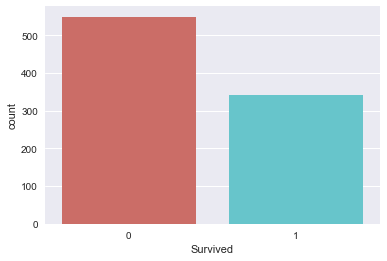

In [5]:

#titanic['Survived'].hist()
sb.countplot(x='Survived',data=titanic, palette='hls')

Some quick overview of all numeric data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC260E8EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EC263B0F28>]], dtype=object)

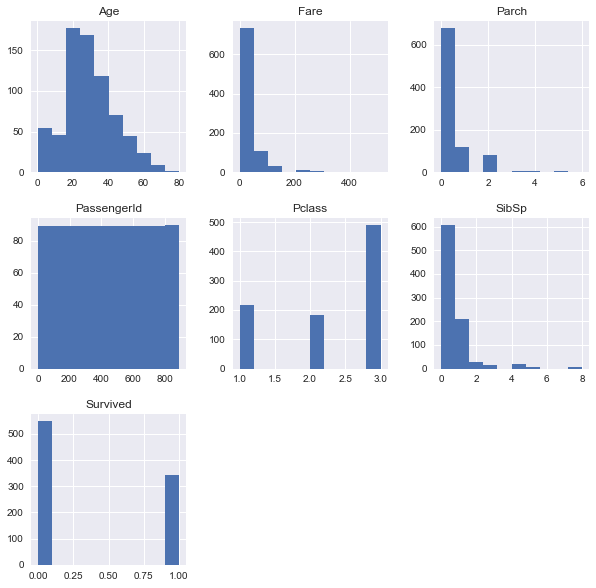

In [6]:
titanic.hist(figsize=(10,10))

# Checking for Missing Values
Note that sometime the 'null' value is not explicitly null (think of -inf for bad null for double)

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin is almost all missing, lets drop it. Also, let's drop all cols that are clearly irrelevant.

Age might be worth completing with approximation

In [8]:
# droping to a new dataset. Expensive, and worth doing only if original data is needed
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Checking for two 'suspects' for determining the age approximation.
Could have done something fancier + using other data like naming, sibling count etc.

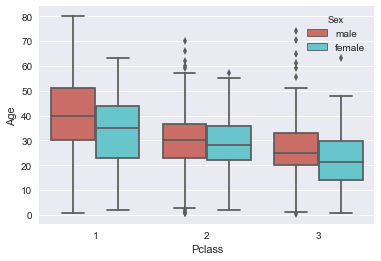

In [9]:
#using seaborn, as it allows boxplot of two features against third one
sb.boxplot(x='Pclass', hue="Sex", y='Age', data=titanic_data, palette='hls')

In [10]:
ageApproximation = titanic_data.groupby(by=['Pclass','Sex'])['Age'].median()
ageApproximation

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [11]:
# Apply rough approx for unknown age

def age_approx(cols, ageApproximation):
    Sex = cols['Sex']
    Pclass = cols['Pclass']
    Age = cols['Age']
    if (np.isnan(Age)):
        return ageApproximation[Pclass,Sex]
    return Age

titanic_data['Age'] = titanic_data.apply(lambda cols : age_approx(cols, ageApproximation), axis=1)

In [12]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
#let's get rid of the two rows with null in Embarked    
titanic_data.dropna(inplace=True)

In [14]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Getting features ready - All categorical variables into numeric variables

In [15]:
#using pandas get_dummies method

titanic_data = pd.get_dummies(data = titanic_data, columns=['Sex', 'Embarked'], drop_first=True) #drop_first saves one feature per variable

In [16]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Drop Correlated features

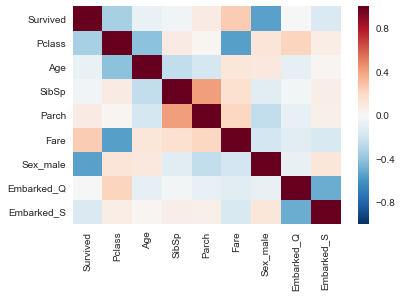

In [17]:
sb.heatmap(titanic_data.corr())  

In [18]:
# Fare is highly correleted wuth Pclass

titanic_data.drop('Fare', axis=1, inplace=True)
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [19]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived      889 non-null int64
Pclass        889 non-null int64
Age           889 non-null float64
SibSp         889 non-null int64
Parch         889 non-null int64
Sex_male      889 non-null uint8
Embarked_Q    889 non-null uint8
Embarked_S    889 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 44.3 KB


In [20]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.065433,0.524184,0.382452,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.270162,1.103705,0.806761,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000


# Get data ready for modeling

In [21]:
#Getting just the 'features'

lastColIndex = titanic_data.columns.size
X = titanic_data.iloc[:,1:lastColIndex]
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1


In [22]:
#Getting just the 'labels'

y_true = titanic_data.iloc[:,0:1]
y_true.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [23]:
# split to train and test sets with sklearn
# setting constant random_state for reversibility

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_true, random_state=42,
                                                    test_size=0.2)

# Modeling

# Logistic regression (sklearn)

In [35]:
#Defining the model and fit (train)

LogReg = LogisticRegression( random_state=42, penalty='l2')
LogReg.fit(X_train, y_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
# Asking for the model for both prediction of labels (y_pred), 
# but also predicated probabilities (logit output, before thresholding)

y_prob_logreg = LogReg.predict_proba(X_test)
y_pred_logreg = LogReg.predict(X_test)

https://en.wikipedia.org/wiki/Logistic_function

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/500px-Logistic-curve.svg.png">

In [38]:
#to some degree weight can be seen as importance of feature

f_weights_reg1 = pd.DataFrame(list(zip(LogReg.coef_[0], X_train.columns)), columns=["weight", "feature"])
f_weights_reg1.reindex(f_weights_reg1.weight.abs().sort_values(ascending = False).index)

,weight,feature
4,-2.385385,Sex_male
0,-0.994470,Pclass
6,-0.327751,Embarked_S
2,-0.319005,SibSp
5,-0.041760,Embarked_Q
1,-0.031475,Age
3,0.010876,Parch



<img src="https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png">

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#making sure confusion_matrix understand 1 is positive and 0 is negative 
confusion_matrix(y_test, y_pred_logreg, labels=[1, 0])

array([[51, 18],
       [19, 90]])

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png">

In [40]:
print(classification_report(y_test, y_pred_logreg, labels=[1, 0]))

             precision    recall  f1-score   support

          1       0.73      0.74      0.73        69
          0       0.83      0.83      0.83       109

avg / total       0.79      0.79      0.79       178



In [41]:
fpr_logreg, tpr_logreg, thresholds_logreg= roc_curve( y_test['Survived'].as_matrix(), y_prob_logreg[:,1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

In [42]:
def GetRocChartReady():
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall/Sensitivity)')
    plt.title('Receiver operating characteristic')


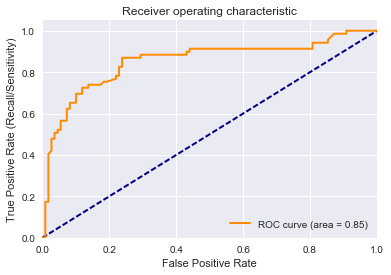

In [43]:
plt.figure()
GetRocChartReady()
lw = 2
plt.plot(fpr_logreg, tpr_logreg, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.legend(loc="lower right")
plt.show()

# Add normalization - making sure all input are in scale

In [44]:
# Model usually performs better when all features are scaled the same
# Also makes sure regularizationworks well (as it treats all weight the same)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scalerTransformX = StandardScaler().fit(X_train)
minMaxTrasformX = MinMaxScaler().fit(X_train)

In [45]:
print (scalerTransformX.transform(X_train)[:,1].mean())
print (scalerTransformX.transform(X_train)[:,1].std())

-1.34913177676e-16
1.0


In [46]:
#X_train_trail = X_train.copy()
#X_train_trail['Sex_male'] = abs( 1 - X_train['Sex_male'])

In [47]:
#Using standartization (StandardScaler/z score)

LogRegScaled = LogisticRegression(random_state=42)
LogRegScaled.fit(scalerTransformX.transform(X_train), y_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
X_test_scaled = scalerTransformX.transform(X_test)

y_probScaled  = LogRegScaled.predict_proba(X_test_scaled)
y_predScaled  = LogRegScaled.predict(X_test_scaled)

In [49]:
#With fully normalization, weight can be seen as importance of feature

f_weights_regScaled = pd.DataFrame(list(zip(LogRegScaled.coef_[0], X_train.columns)), columns=["weight", "feature"])
f_weights_regScaled.reindex(f_weights_regScaled.weight.abs().sort_values(ascending = False).index)

,weight,feature
4,-1.277769,Sex_male
0,-1.076692,Pclass
1,-0.655172,Age
2,-0.466347,SibSp
6,-0.223090,Embarked_S
5,-0.060137,Embarked_Q
3,-0.035433,Parch


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predScaled, labels=[1,0])

array([[55, 14],
       [21, 88]])

In [51]:
print(classification_report(y_test, y_predScaled, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.72      0.80      0.76        69
          0       0.86      0.81      0.83       109

avg / total       0.81      0.80      0.80       178



In [52]:
fpr_reg_scaled, tpr_reg_scaled, thresholds_reg_scaled= roc_curve( y_test['Survived'].as_matrix(), y_probScaled[:,1])

In [53]:
roc_auc_reg_scaled = auc(fpr_reg_scaled, tpr_reg_scaled)

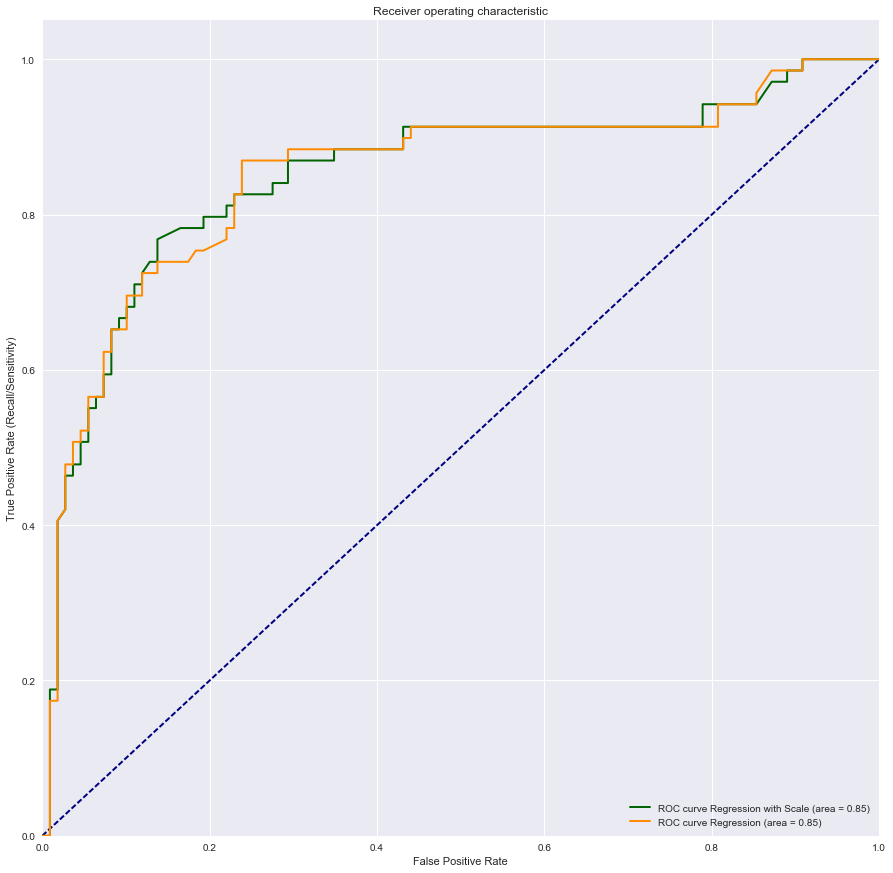

In [54]:
plt.figure(figsize=(15,15))
GetRocChartReady()
lw = 2
plt.plot(fpr_reg_scaled, tpr_reg_scaled, color='darkgreen',
         lw=lw, label='ROC curve Regression with Scale (area = %0.2f)' % roc_auc_reg_scaled)

plt.plot(fpr_logreg, tpr_logreg, color='darkorange',
         lw=lw, label='ROC curve Regression (area = %0.2f)' % roc_auc_logreg)

plt.legend(loc="lower right")
plt.show()

Normalized model is only slightly better in this case

# Simple Keras NN model (no hidden layers)

Artificial neural networks (ANNs) or connectionist systems are computing systems inspired by the biological neural networks that constitute animal brains. Such systems learn (progressively improve performance on) tasks by considering examples, 
generally without task-specific programming

"Deep" NN

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png">

Shallow NN 

<img src="https://cdn-images-1.medium.com/max/1200/0*kETHX4MtZfu8_0sE.png">

In [56]:
np.random.seed(42)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.regularizers import l2,l1


In [57]:
# first, simplest model (rmsprop optimzier, no hidden layer)

# first parmater of Dence() is the output/predicted label count. In our case just one
# kernel_regularizer=l2(), just like the default in LogisticRegression
# for the first layer, feature count

model = Sequential()
model.add(Dense(len(y_train.axes[1]), activation='sigmoid',kernel_regularizer=l2(), input_dim=X_train.shape[1]))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


8 Trainable params:  7 weights and 1 bias

In [58]:
#lots of optimizers
#loss is binary_crossentropy (just like in logistic regression )

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
#part of the trained data is used just for validation

model.fit(X_train.as_matrix(), y_train.as_matrix(), epochs=20, validation_split=1/12, batch_size=1)

Train on 651 samples, validate on 60 samples
Epoch 1/20
651/651 [==============================] - 1s - loss: 0.6477 - acc: 0.6636 - val_loss: 0.5575 - val_acc: 0.7833
Epoch 2/20
651/651 [==============================] - 1s - loss: 0.6306 - acc: 0.6912 - val_loss: 0.5530 - val_acc: 0.7500
Epoch 3/20
651/651 [==============================] - 1s - loss: 0.6147 - acc: 0.6851 - val_loss: 0.5513 - val_acc: 0.7667
Epoch 4/20
651/651 [==============================] - 1s - loss: 0.6036 - acc: 0.6866 - val_loss: 0.5443 - val_acc: 0.7667
Epoch 5/20
651/651 [==============================] - 1s - loss: 0.5904 - acc: 0.7035 - val_loss: 0.5588 - val_acc: 0.7667
Epoch 6/20
651/651 [==============================] - 1s - loss: 0.5861 - acc: 0.7127 - val_loss: 0.5356 - val_acc: 0.7833
Epoch 7/20
651/651 [==============================] - 1s - loss: 0.5778 - acc: 0.7266 - val_loss: 0.5354 - val_acc: 0.8000
Epoch 8/20
651/651 [==============================] - 1s - loss: 0.5723 - acc: 0.7373 - val_lo

In [105]:
prediction_nn1 = model.predict(X_test.as_matrix())

In [106]:
from sklearn.metrics import confusion_matrix
threshold = 0.5

confusion_matrix(y_test.as_matrix(), (prediction_nn1[:,0]>threshold).astype(int), labels =[1,0])

array([[46, 23],
       [15, 94]])

In [107]:
print(classification_report(y_test, (prediction_nn1[:,0]>threshold).astype(int),  labels =[1,0]))

             precision    recall  f1-score   support

          1       0.75      0.67      0.71        69
          0       0.80      0.86      0.83       109

avg / total       0.78      0.79      0.78       178



In [108]:
fpr_nn1, tpr_nn1, thresholds_nn1= roc_curve( y_test['Survived'].as_matrix(), prediction_nn1[:,0])
roc_auc_nn1 = auc(fpr_nn1, tpr_nn1)

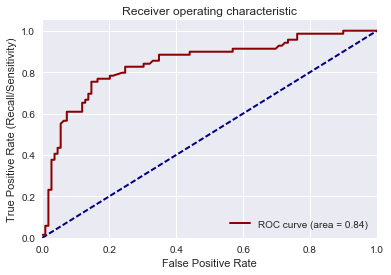

In [112]:
fig = plt.figure()
GetRocChartReady()
plt.plot(fpr_nn1, tpr_nn1, color='darkred',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn1)
plt.legend(loc="lower right")
plt.show()

In [113]:
weights = model.layers[0].get_weights()

f_weights_nn1 = pd.DataFrame(list(zip(weights[0], X_train.columns)), columns=["weight", "feature"])
f_weights_nn1.reindex(f_weights_nn1.weight.abs().sort_values(ascending = False).index)


,weight,feature
4,[-1.64342],Sex_male
0,[-0.35382],Pclass
6,[-0.271257],Embarked_S
3,[0.191215],Parch
5,[-0.0770967],Embarked_Q
2,[-0.0204034],SibSp
1,[0.00686826],Age


# Try with standartization

In [114]:
model.fit(scalerTransformX.transform(X_train), y_train.as_matrix(), epochs=20, validation_split=1/12, batch_size=1)


Train on 651 samples, validate on 60 samples
Epoch 1/20
651/651 [==============================] - 1s - loss: 0.6909 - acc: 0.7465 - val_loss: 0.7303 - val_acc: 0.6667
Epoch 2/20
651/651 [==============================] - 1s - loss: 0.6329 - acc: 0.7634 - val_loss: 0.6814 - val_acc: 0.7667
Epoch 3/20
651/651 [==============================] - 1s - loss: 0.5911 - acc: 0.7711 - val_loss: 0.6478 - val_acc: 0.7667
Epoch 4/20
651/651 [==============================] - 1s - loss: 0.5586 - acc: 0.7757 - val_loss: 0.6201 - val_acc: 0.7667
Epoch 5/20
651/651 [==============================] - 1s - loss: 0.5350 - acc: 0.7773 - val_loss: 0.5969 - val_acc: 0.7667
Epoch 6/20
651/651 [==============================] - 1s - loss: 0.5152 - acc: 0.7788 - val_loss: 0.5788 - val_acc: 0.7667
Epoch 7/20
651/651 [==============================] - 1s - loss: 0.5012 - acc: 0.7819 - val_loss: 0.5653 - val_acc: 0.7500
Epoch 8/20
651/651 [==============================] - 1s - loss: 0.4907 - acc: 0.7803 - val_lo

In [115]:
weights = model.layers[0].get_weights()
f_weights_nn2 = pd.DataFrame(list(zip(weights[0], X_train.columns)), columns=["weight", "feature"])
f_weights_nn2.reindex(f_weights_nn1.weight.abs().sort_values(ascending = False).index)

,weight,feature
4,[-1.19291],Sex_male
0,[-0.893557],Pclass
6,[-0.240513],Embarked_S
3,[0.0928479],Parch
5,[-0.0618687],Embarked_Q
2,[-0.250713],SibSp
1,[-0.443639],Age


In [116]:
prediction_nn2 = model.predict(scalerTransformX.transform(X_test))

In [117]:
from sklearn.metrics import confusion_matrix
threshold = 0.5

confusion_matrix(y_test.as_matrix(), (prediction_nn2[:,0]>threshold).astype(int), labels=[1,0])




array([[53, 16],
       [22, 87]])

In [118]:
print(classification_report(y_test, (prediction_nn2[:,0]>threshold).astype(int), labels=[1,0]))

             precision    recall  f1-score   support

          1       0.71      0.77      0.74        69
          0       0.84      0.80      0.82       109

avg / total       0.79      0.79      0.79       178



# Adding Hidden Layer

No real reason to go beyond linear model for this case

In [120]:
model_hidden = Sequential()
hiddenLayerNodeCount = 4
model_hidden.add(Dense(hiddenLayerNodeCount, activation='tanh', input_dim=X_train.shape[1], kernel_regularizer= l2()))
model_hidden.add(Dense(len(y_train.axes[1]), activation='sigmoid', input_dim=hiddenLayerNodeCount))
model_hidden.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


Fully connected Network
1st layer - 7*4 + 4 = 32
second layer - 4 + 1 = 5

In [122]:
model_hidden.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:

model_hidden.fit(scalerTransformX.transform(X_train), y_train.as_matrix(), epochs=15, validation_split=1/12, batch_size=1)




Train on 651 samples, validate on 60 samples
Epoch 1/15
651/651 [==============================] - 3s - loss: 0.7447 - acc: 0.5991 - val_loss: 0.5963 - val_acc: 0.7833
Epoch 2/15
651/651 [==============================] - 3s - loss: 0.5629 - acc: 0.7711 - val_loss: 0.5251 - val_acc: 0.8500
Epoch 3/15
651/651 [==============================] - 3s - loss: 0.5073 - acc: 0.7988 - val_loss: 0.5129 - val_acc: 0.7833
Epoch 4/15
651/651 [==============================] - 3s - loss: 0.4858 - acc: 0.7942 - val_loss: 0.5107 - val_acc: 0.7833
Epoch 5/15
651/651 [==============================] - 2s - loss: 0.4747 - acc: 0.7988 - val_loss: 0.5093 - val_acc: 0.7667
Epoch 6/15
651/651 [==============================] - 2s - loss: 0.4672 - acc: 0.8080 - val_loss: 0.5084 - val_acc: 0.7833
Epoch 7/15
651/651 [==============================] - 2s - loss: 0.4617 - acc: 0.8080 - val_loss: 0.5060 - val_acc: 0.7833
Epoch 8/15
651/651 [==============================] - 3s - loss: 0.4579 - acc: 0.8126 - val_lo

In [124]:
prediction_nn2 = model_hidden.predict(scalerTransformX.transform(X_test))

In [125]:
from sklearn.metrics import confusion_matrix
threshold = 0.5

confusion_matrix_nn2 = confusion_matrix(y_test.as_matrix(), (prediction_nn2[:,0]>threshold).astype(int), labels=[1,0])
confusion_matrix_nn2

array([[55, 14],
       [20, 89]])

In [126]:
print(classification_report(y_test, (prediction_nn2[:,0]>threshold).astype(int), labels=[1,0]))

             precision    recall  f1-score   support

          1       0.73      0.80      0.76        69
          0       0.86      0.82      0.84       109

avg / total       0.81      0.81      0.81       178



In [127]:
fpr_nn2, tpr_nn2, thresholds_nn2= roc_curve( y_test['Survived'].as_matrix(), prediction_nn2[:,0])
roc_auc_nn2 = auc(fpr_nn2, tpr_nn2)

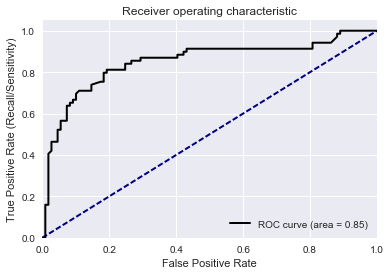

In [129]:
fig = plt.figure()
GetRocChartReady()
plt.plot(fpr_nn2, tpr_nn2, color='black',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn2)
plt.legend(loc="lower right")
plt.show()